# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv("previsao_de_renda.csv")
df["data_ref"] = pd.to_datetime(df["data_ref"])

In [5]:
df.drop(columns=["Unnamed: 0", "mau", "index", ], inplace=True)

In [6]:
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [7]:
df_raw = df[["posse_de_veiculo", "posse_de_imovel", "renda"]]

In [14]:
df_raw.loc[ (df_raw["posse_de_veiculo"] == True) & (df_raw["posse_de_imovel"] == True)]['renda'].mean()

5057.2006149870795

In [15]:
df_raw.loc[ (df_raw["posse_de_veiculo"] == False) & (df_raw["posse_de_imovel"] == False)]['renda'].mean()

4135.868138747885

In [16]:
df_raw.loc[ (df_raw["posse_de_veiculo"] == False) & (df_raw["posse_de_imovel"] == True)]['renda'].mean()

4511.636667739858

In [17]:
df_raw.loc[ (df_raw["posse_de_veiculo"] == True) & (df_raw["posse_de_imovel"] == False)]['renda'].mean()

4865.18109016811

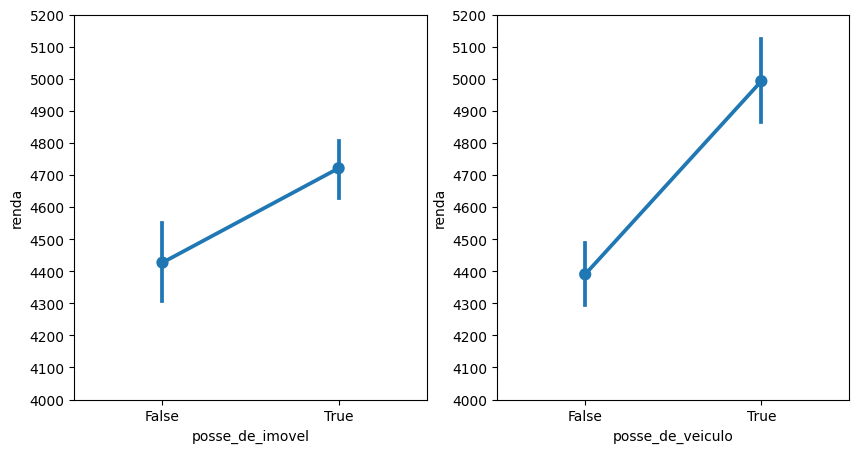

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.pointplot(ax=axes[0], x="posse_de_imovel", y="renda", data=df_raw)
axes[0].set_yticks([i for i in range(4000, 5300, 100)])

sns.pointplot(ax=axes[1], x="posse_de_veiculo", y="renda", data=df_raw)
axes[1].set_yticks([i for i in range(4000, 5300, 100)])
plt.show()


##### Com analise no gráfico acima podemos disser que para esse caso, a possode veiculo determina melhor a renda da pessoa

In [42]:
df_raw.groupby([ "posse_de_imovel","posse_de_veiculo"]).mean()

renda
posse_de_imovel posse_de_veiculo             
False           False             4135.868139
                True              4865.181090
True            False             4511.636668
                True              5057.200615